In [ ]:
#240701578
#varnika
#7-10-25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


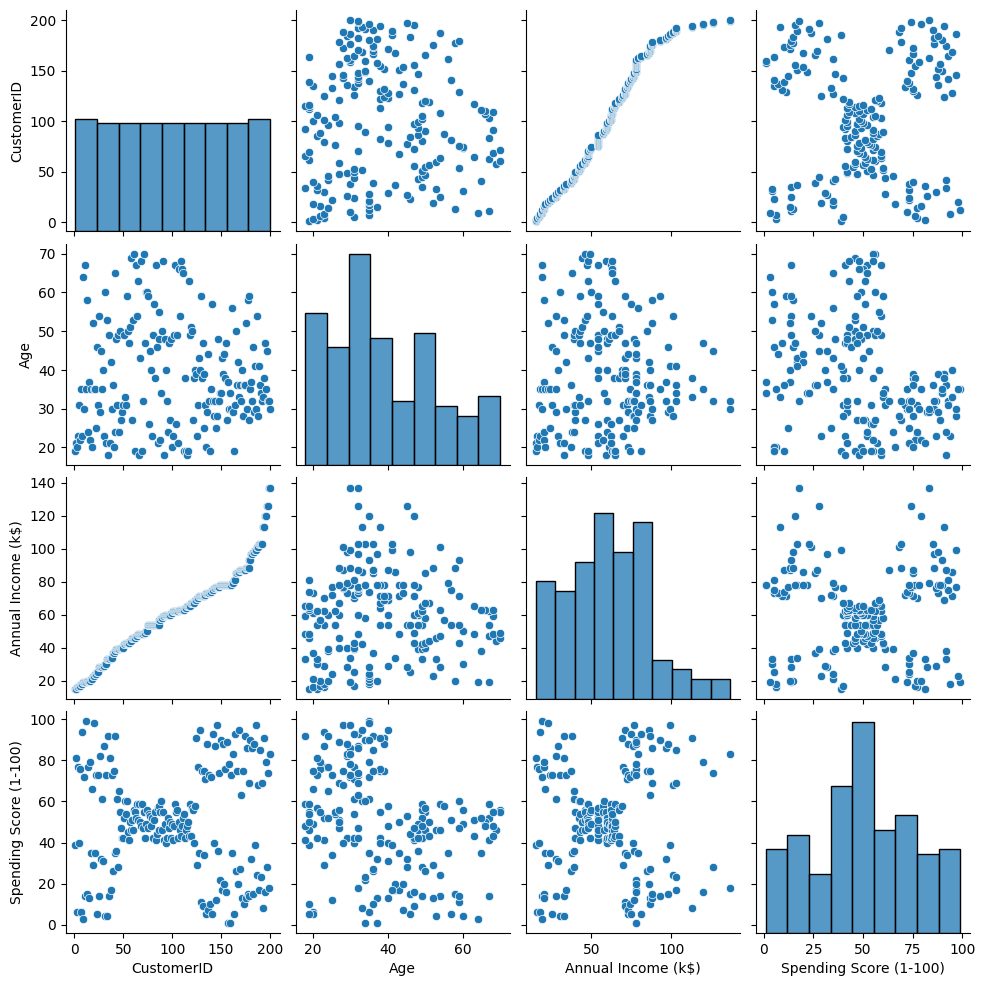

In [5]:
sns.pairplot(df)

In [6]:
features=df.iloc[:,[3,4]].values

In [7]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(features)
KMeans(n_clusters=5)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [8]:
Final = df.iloc[:, [3, 4]].copy()
Final['label'] = model.predict(features)
Final.head()


,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


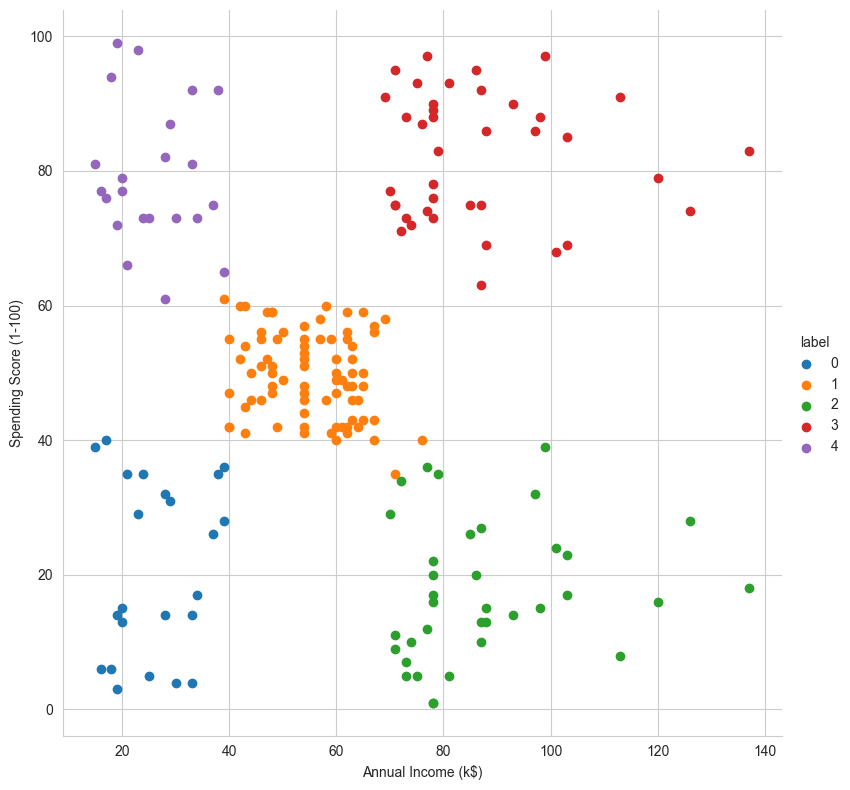

In [12]:
sns.set_style("whitegrid")
sns.FacetGrid(Final,hue="label",height=8) \
.map(plt.scatter,"Annual Income (k$)", "Spending Score (1-100)") \
.add_legend();
plt.show()

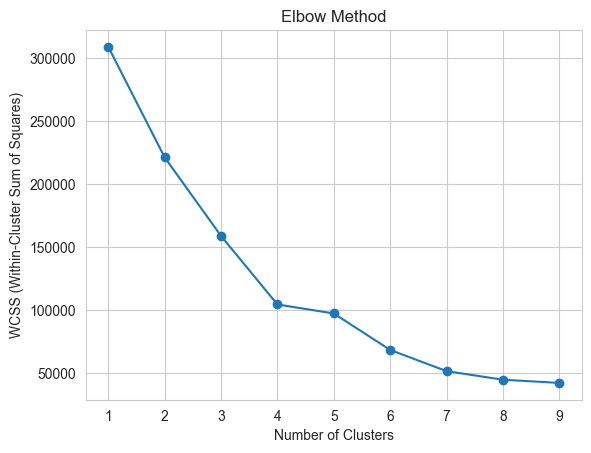

In [10]:
features_el=df.iloc[:,[2,3,4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(features_el)
    wcss.append(model.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()